In [1]:
import tensorflow as tf  

gpus = tf.config.experimental.list_physical_devices('GPU')  

print(gpus)  

if gpus:  

    try:

        for gpu in gpus:

            tf.config.experimental.set_memory_growth(gpu, True)

    except RuntimeError as e:

        print(e)

[]


In [2]:
import glob
from PIL import Image
import glob

all_images=[]

img_size=(32,20)

labels=[]

for f in glob.glob('c:\\data\\power\\**\\*.jpg', recursive=True):

    arr=f.split('\\')

    img = Image.open(f)

    img_resize = img.resize((img_size[0], img_size[1]))

    all_images.append(img_resize)

    label=float(arr[3])

    labels.append(label)

In [3]:
labels[:10]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [4]:
len(labels)

12319

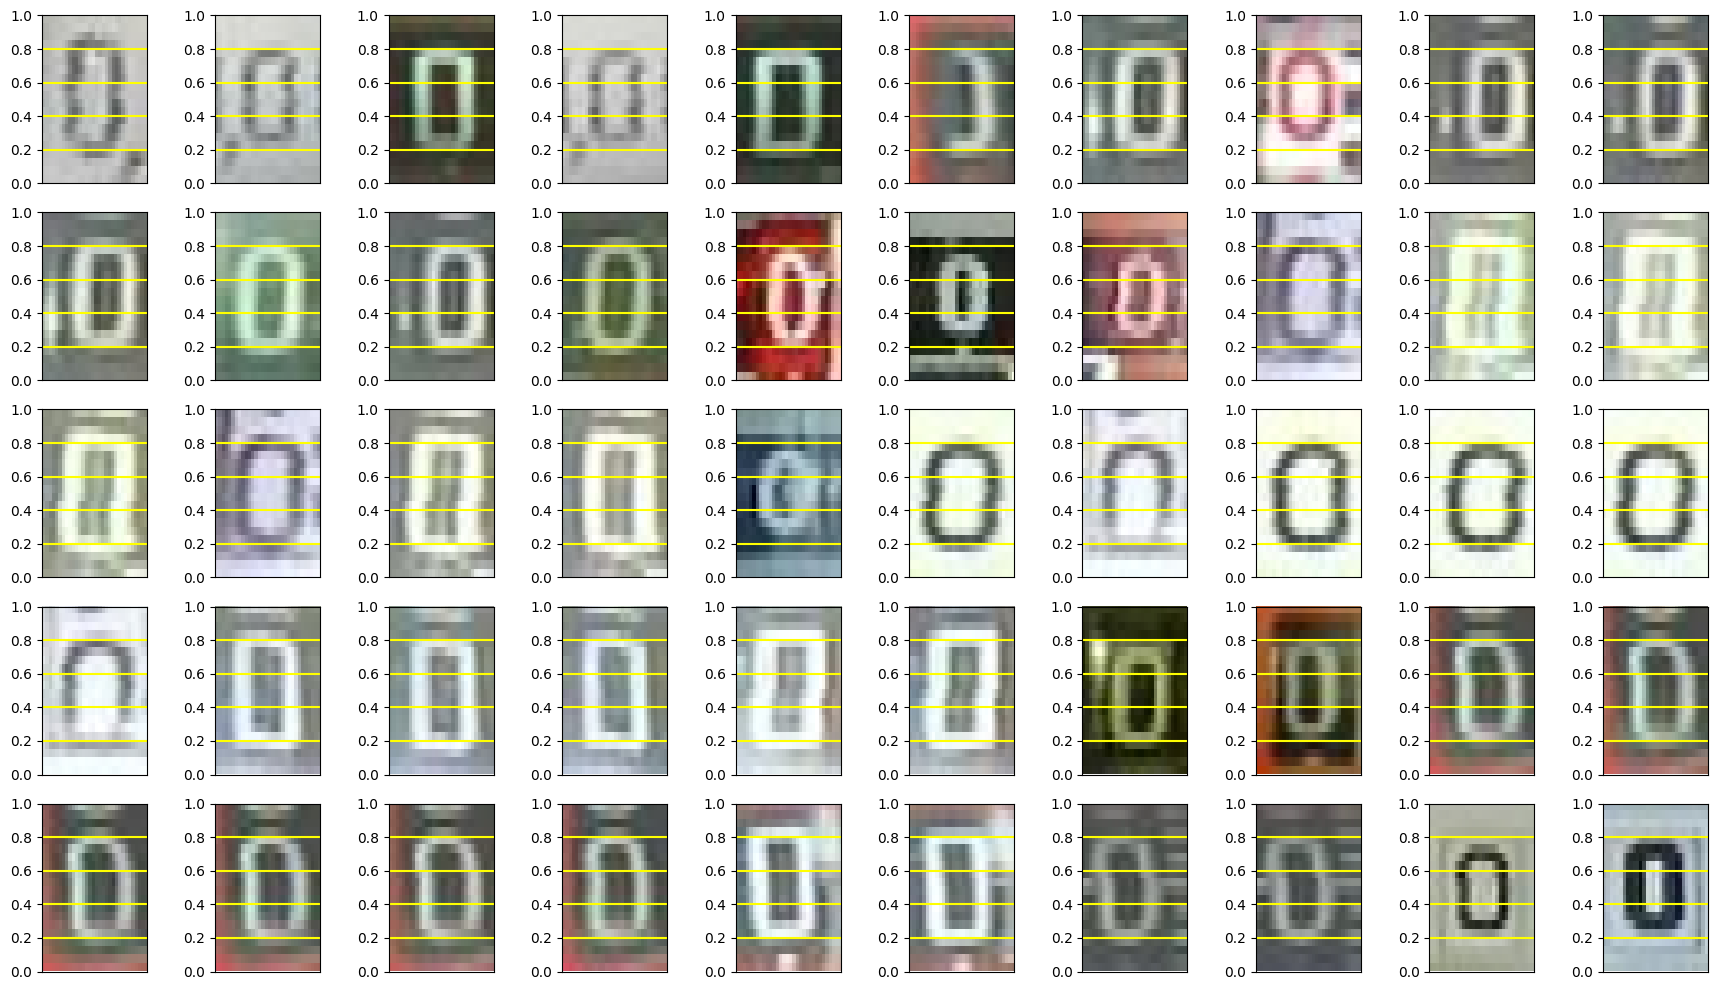

In [5]:
import matplotlib.pyplot as plt

import numpy as np

fig = plt.figure(figsize=(18, 10))

columns = 10

rows = 5

for i in range(1, columns*rows +1):

    if i>len(all_images):

        break

    fig.add_subplot(rows, columns, i)

    plt.xticks([0.2, 0.4, 0.6, 0.8])

    # aspect='1.6' 실제 이미지의 1.6배(축척 조정)

    # extent=(xmin,xmax,ymin,ymax) x,y 축의 범위

    plt.imshow((all_images[i-1]), aspect='1.6', extent=[0, 1, 0, 1])

    for y in np.arange(0.2, 0.8, 0.2):

        plt.axhline(y=y,color='yellow')

    ax=plt.gca()

    ax.get_xaxis().set_visible(False)

    plt.tight_layout()

    

plt.show()

In [6]:
a=['a','b','c','b','c']

np.unique(labels, return_inverse=True)

# (array(['a', 'b', 'c'], dtype='<U1'), array([0, 1, 2, 1, 2], dtype=int64))

# 유일한 값은 'a','b','c'

# 인덱스 0   1   2 를 원래 리스트 a에 인덱스 부여

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
        1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
        2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
        3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
        6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
        7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
        9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9]),
 array([ 0,  0,  0, ..., 99, 99, 99], dtype=int64))

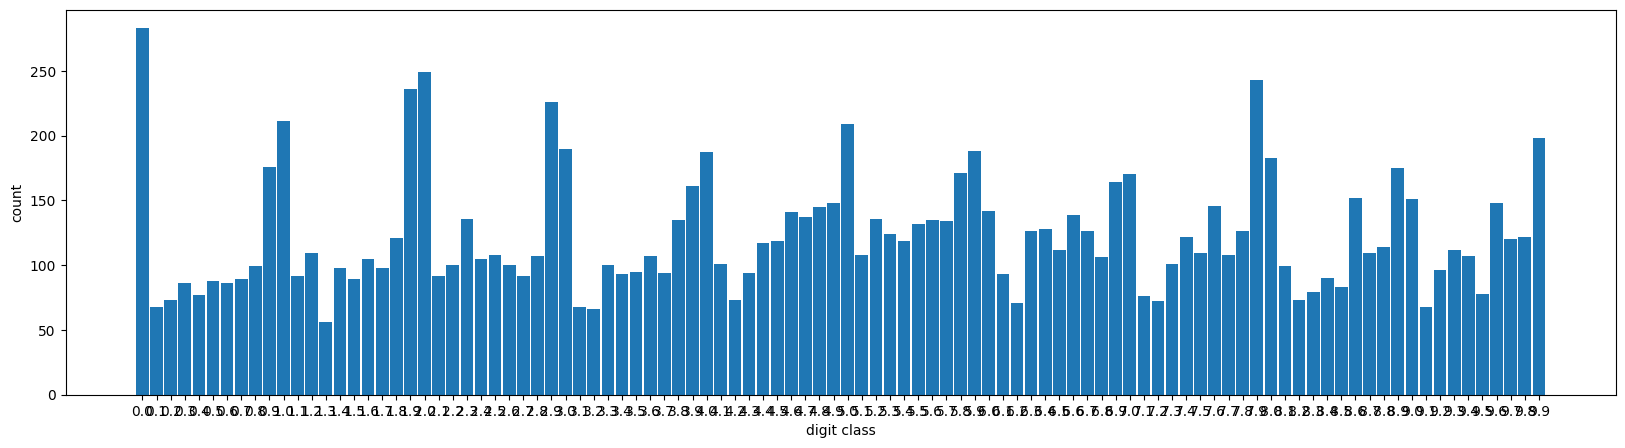

In [7]:
_, inverse = np.unique(labels, return_inverse=True)

# 구간별 카운트 계산
data_bincount = np.bincount(inverse)

plt.figure(figsize=(20,5))
plt.bar(np.arange (0, 10, 0.1), data_bincount, width=0.09, align='center')
plt.ylabel('count')
plt.xlabel('digit class')
plt.xticks(np.arange(0, 10, 0.1))
plt.show()

In [8]:
# 오래걸림
# 비어있는 이미지 만들어서 합치기
X=np.empty((1,img_size[0],img_size[1],3))

for img in all_images:
    # vstack : 이미지 세로로 쌓기
    X=np.vstack((X,np.array(img).reshape(1,img_size[0],img_size[1],3)))
X.shape

(12320, 32, 20, 3)

In [9]:
# 빈 이미지 제거
X = np.delete(X, (0), axis=0)

In [10]:
X.shape

(12319, 32, 20, 3)

In [11]:
x_data=X/255.

x_data

array([[[[0.71764706, 0.72156863, 0.69803922],
         [0.71764706, 0.72156863, 0.69803922],
         [0.72156863, 0.7254902 , 0.69803922],
         ...,
         [0.78823529, 0.79215686, 0.76862745],
         [0.81960784, 0.82352941, 0.8       ],
         [0.80392157, 0.80784314, 0.78431373]],

        [[0.8       , 0.80392157, 0.78039216],
         [0.81176471, 0.81568627, 0.79215686],
         [0.77647059, 0.78039216, 0.75686275],
         ...,
         [0.74117647, 0.74509804, 0.7254902 ],
         [0.74509804, 0.74901961, 0.7254902 ],
         [0.75686275, 0.76078431, 0.74117647]],

        [[0.77647059, 0.78039216, 0.76078431],
         [0.79215686, 0.79607843, 0.77647059],
         [0.80392157, 0.80784314, 0.78823529],
         ...,
         [0.78823529, 0.78823529, 0.76078431],
         [0.8       , 0.8       , 0.76862745],
         [0.80392157, 0.80392157, 0.77254902]],

        ...,

        [[0.78431373, 0.78431373, 0.78431373],
         [0.76470588, 0.76470588, 0.76470588]

In [12]:
y_data=np.array(labels)

y_data

array([0. , 0. , 0. , ..., 9.9, 9.9, 9.9])

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2,  shuffle=True,  random_state=10)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9855, 32, 20, 3), (2464, 32, 20, 3), (9855,), (2464,))

In [14]:
from keras.models import Sequential
from keras.layers import *

model = Sequential()
model.add(BatchNormalization(input_shape=(32,20,3))) # 미니배치의 출력값을 정규화
model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))

model.add(BatchNormalization())

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dropout(0.4))

model.add(Dense(128,activation="relu"))

model.add(Dropout(0.4))

model.add(Dense(1, activation = None))

model.compile(loss='mae', optimizer="rmsprop", metrics = ["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 32, 20, 3)        12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 32, 20, 32)        896       
                                                                 
 batch_normalization_1 (Batc  (None, 32, 20, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 10, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 10, 32)        0         
                                                        

In [15]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("c:/data/model/power_best.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

hist = model.fit(X_train, y_train, batch_size=32, validation_split=0.2, epochs=40, callbacks=[checkpoint])

Epoch 1/40
247/247 [==============================] - ETA: 0s - loss: 2.7184 - mae: 2.7184
Epoch 1: val_loss improved from inf to 3.06775, saving model to c:/data/model\power_best.h5
247/247 [==============================] - 5s 17ms/step - loss: 2.7184 - mae: 2.7184 - val_loss: 3.0678 - val_mae: 3.0678
Epoch 2/40
246/247 [============================>.] - ETA: 0s - loss: 2.2753 - mae: 2.2753
Epoch 2: val_loss improved from 3.06775 to 2.37409, saving model to c:/data/model\power_best.h5
247/247 [==============================] - 4s 17ms/step - loss: 2.2745 - mae: 2.2745 - val_loss: 2.3741 - val_mae: 2.3741
Epoch 3/40
247/247 [==============================] - ETA: 0s - loss: 2.0928 - mae: 2.0928
Epoch 3: val_loss improved from 2.37409 to 2.26348, saving model to c:/data/model\power_best.h5
247/247 [==============================] - 4s 18ms/step - loss: 2.0928 - mae: 2.0928 - val_loss: 2.2635 - val_mae: 2.2635
Epoch 4/40
243/247 [============================>.] - ETA: 0s - loss: 1.9740 

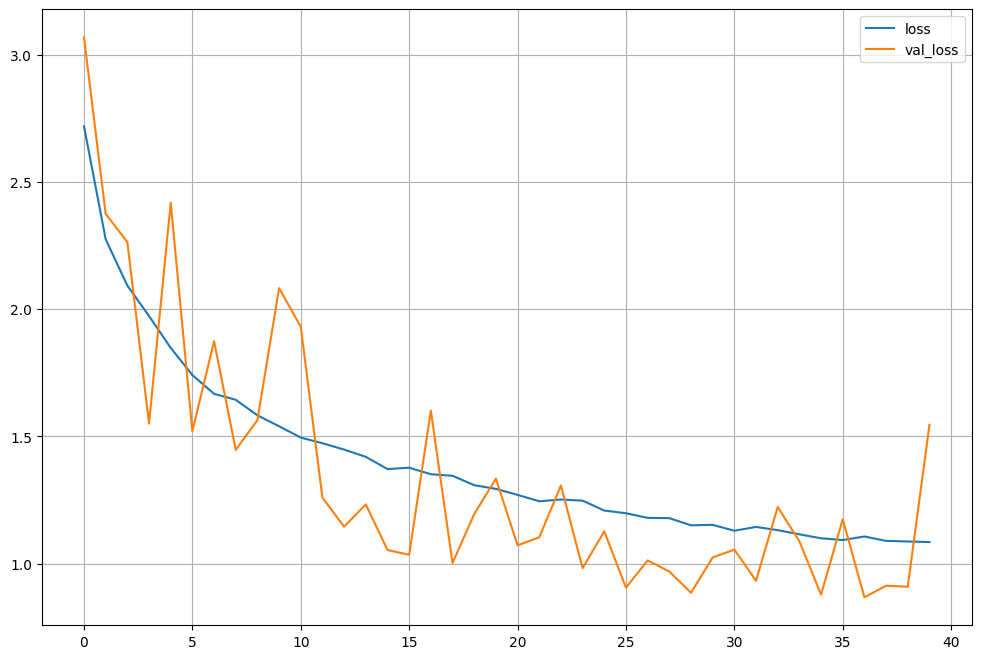

In [16]:
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.grid()
plt.show()

In [17]:
from tensorflow.keras.models import load_model

model = load_model('c:/data/model/power_best.h5')

scores = model.evaluate(X_train, y_train, verbose=1)

print(scores)

308/308 [==============================] - 2s 5ms/step - loss: 0.7739 - mae: 0.7739
[0.7738850116729736, 0.7738850116729736]


In [18]:
scores = model.evaluate(X_test, y_test, verbose=1)

print(scores)

77/77 [==============================] - 0s 5ms/step - loss: 0.8825 - mae: 0.8825
[0.882530689239502, 0.882530689239502]


In [19]:
pred=model.predict(X_test)

pred[:5]

77/77 [==============================] - 1s 6ms/step


array([[5.709132  ],
       [7.972957  ],
       [2.9388494 ],
       [3.085112  ],
       [0.03570437]], dtype=float32)

In [20]:
y_test[:5]

array([5.8, 8.1, 4. , 8. , 0.2])